# Decision Tree
* 여러가지 규칙을 순차적으로 적용하면서 독립 변수 공간을 분할하는 분류 모형
* 스무고개 놀이와 개념이 유사
* 분류(classification)과 회귀 분석(regression)에 모두 사용될 수 있기 때문에 CART(Classification And Regression Tree)라고도 함

<img src = "https://tensorflowkorea.files.wordpress.com/2017/06/2-22.png?w=768&h=546" width = 500/>


## 분류법
1. 여러 독립 변수 중 하나의 독립 변수를 선택하고 그 독립 변수에 대한 기준값(Treshold)을 설정. 이 기준값을 분류 규칙이라고 함  
    * 범주형 변수: ex) 남자이다. 날 수 있다.
    * 연속형 변수: ex) 요금 5달러, 시속 200km
--- 
2. 학습 데이터 집합(부모 노드)을 해당 독립 변수의 값이 기준값보다 작은 데이터 그룹(자식 노드 1)과 해당 독립 변수의 값이 기준값보다 큰 데이터 그룹(자식 노드2)로 나눔
    * 범주형 변수: ex) 남자이다. - 예, 날 수 있다. - 아니오 
    * 연속형 변수: ex) 요금 5달러 - 작다, 시속 200km - 크거나 같다.
---
3. 각각의 자식 노드에 대해 1~2의 단계를 반복하여 하위의 자식 노드를 만든다. 단, 자식 노드에 한 가지 클래스의 데이터만 존재한다면 더 이상 자식 노드를 나누지 않고 중지한다.
    * 날 수 있다. - 아니오: 사람, 강아지, 소 => 반복
    * 시속 200km - 크거나 같다: 비행기 => 중지

## 분류예측
* 학습된 의사결정나무에 테스트 데이터를 적용하면 각 데이터는 특정한 노드를 타고 내려가게됨. 데이터가 마지막 노드에 도착하면 해당 노드의 조건부 확률 분포를 이용하여 클래스를 예측
    * ex) 마지막 노드에 사람7, 강아지2, 소1 이 있다면 해당 노드에 들어오는 테스트 데이터는 7/10 확률로 사람이라고 예측

## 분류규칙
### 불순도(Impurity)
* 불순도(Impurity): 해당 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지를 뜻함
<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FqLXhZ%2FbtqwWyZl6iV%2FUZnQbf9L5HAFzf6hFfxK71%2Fimg.png" width = 200>
* 빨간선 기준 위쪽은 불순도가 낮고 아래쪽은 불순도가 높다.
* 한 범주에 하나의 데이터만 존재 => 불순도 최소
* 한 범주에 두 종류의 데이터가 반반 존재 => 불순도 최대

### 엔트로피(Entropy)
* 엔트로피: 불순도를 수치적으로 나타낸 척도 => 엔트로피와 불순도는 비례
* 한 범주에 하나의 데이터만 존재 => 불순도 최소, 엔트로피 = 0
* 한 범주에 두 종류의 데이터가 반반 존재 => 불순도 최대, 엔트로피 = 1
> <img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fk.kakaocdn.net%2Fdn%2FpL6pO%2FbtqwVDN1V94%2FTYgn5iFrPTfgdVwZhxVKl1%2Fimg.png" width = 400>
Pi = 한 영역 안에 존재하는 데이터 가운데 범주 i에 속하는 데이터의 비율
#### 예제
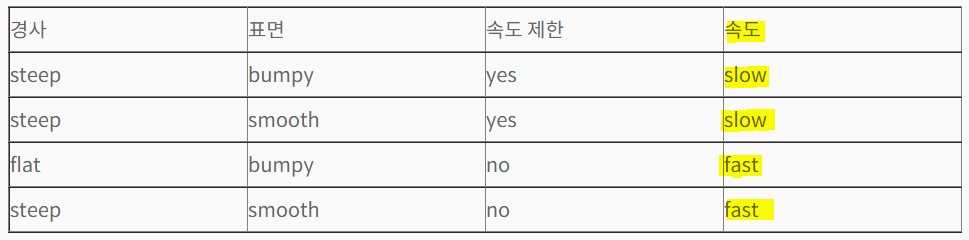
* P_slow = 2/4 = 0.5, P_fast = 2/4 = 0.5
>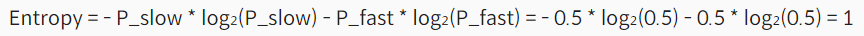
> 현재 범주 전체의 엔트로피 = 1  
> 두 종류의 데이터가 반반 존재하기 때문에 직관적으로도 1이라는 것을 알 수 있다. 

### 정보 획득(Information gain)
>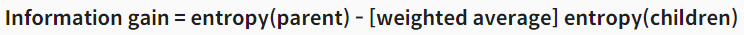
* 정보 획득량 = 분기 이전의 엔트로피에서 분기 이후의 엔트로피를 뺀 수치
* ex) 엔트로피가 1인 상태에서 분기 후 0.7인 상태로 바뀌었다면 정보 획득량은 0.3이다.
* 분기를 하면 범주가 2개 이상으로 쪼개지기 때문에 가중 평균(weighted average)을 활용하여 분기 이후 엔트로피를 구함
#### 예제 
> ### 경사(grade)기준 분기
> * steep: slow, slow, fast
> * flat: fast  
> * entropy(flat) = 0
> * entropy(steep) = 0.9184
>> P_slow = 2/3, P_fast = 1/3
>> 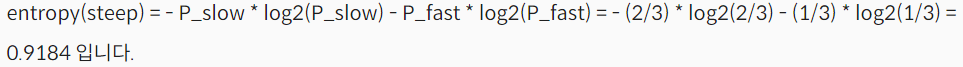
> * 가중평균(weighted average) = 0.6888
>> weighted average of steep  = 3/4, weighted average of flat = 1/4
>> 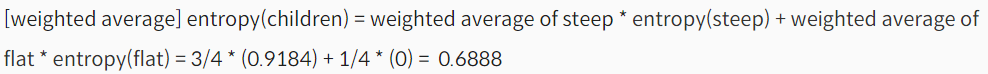
> * 정보획득량(information gain) = 0.3112
>> 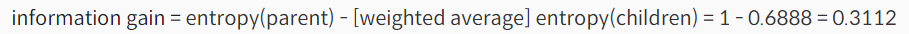
>
> ### 표면(bumpiness)기준 분기
> * bumpy: slow, fast
> * smooth: slow, fast
> * entropy(bumpy) = 1
> * entorpy(bumpy) = 1
>> P_slow = 1/2, P_fast = 1/2
>> 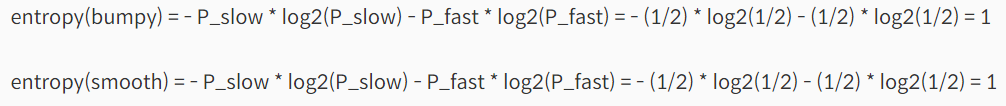
> * 정보획득량(information gain) = 0
---
* 분류 규칙을 정하는 방법은 부모 노드와 자식 노드 간의 엔트로피를 가장 낮게 만드는 최상의 독립 변수와 기준값을 찾는 법
* 정량화된 기준: 정보획득량(information gain)
* 모든 독립 변수와 모든 가능한 기준값에 대해 정보획득량을 구하여 가장 정보획득량이 큰 독립 변수와 기준값을 선택

## 타이타닉

In [8]:
import pandas as pd

### 데이터 확인

In [9]:
base = './titanic/'
gender_submission = pd.read_csv(base + 'gender_submission.csv')
train = pd.read_csv(base + 'train.csv')
test = pd.read_csv(base + 'test.csv')

kaggle 테스트 데이터

In [10]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [11]:
data = train.copy()
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

* PassengerId: 승객번호
* Survived: 0 = No, 1 = Yes
* Pclass: 티켓 등급
* Name: 이름 
* Sex: 성별 
* Age: 나이
* SibSp: 함께 탑승한 형제, 배우자의 수 
* Parch: 함께 탑승한 부모, 자식의 수
* Ticket: 티켓 이름
* Fare: 요금
* Cabin: 객실 번호
* Embarked: 승선한 항구

In [13]:
data.shape

(891, 12)

### 결측치 확인

In [14]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# 결측치 비율 확인
(data.isnull().sum() / len(data)) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

나이와 객실번호, 항구에 결측치가 존재
* Age: 약 20%의 결측치
* Cabin: 약 77%의 결측치
* Embarked: 약 22%의 결측치

### Target Label 확인
* classification 문제에서 taget의 분포에 따라 모델의 평가 방법이 달라질 수 있음.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings 
import warnings
warnings.filterwarnings('ignore')

sns.set(font_scale = 2.5)

%matplotlib inline

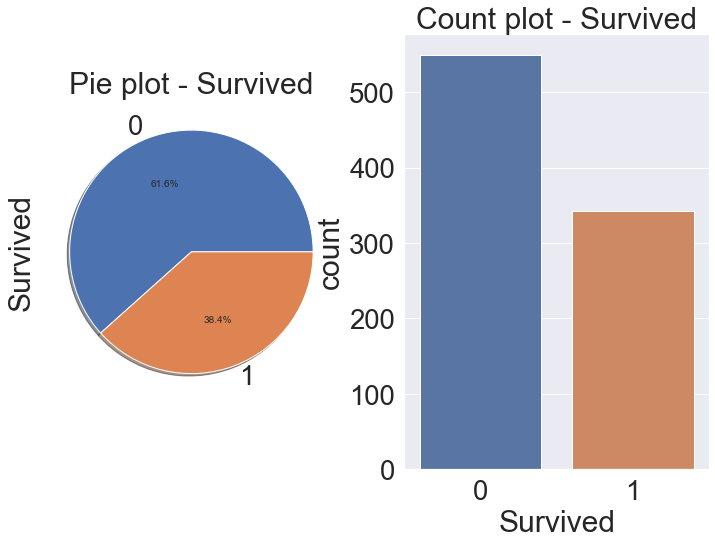

In [18]:
f, ax = plt.subplots(1, 2, figsize = (12, 8))

# 생존자 수 pie plot
data['Survived'].value_counts().plot.pie(autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Pie plot - Survived')

# 생존자 수 count plot
sns.countplot('Survived', data = train, ax = ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

* 생존: 61.6%, 사망: 38.4%
* target label의 분포는 6:4정도로 대체로 균일한 것으로 보임

### EDA

#### Pclass
* 티켓등급: 1등석, 2등석, 3등석

In [19]:
# Pclass별 탑승인원의 수
data[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,216
2,184
3,491


3등석 탑승자의 수가 가장 1, 2등석 탑승자의 수를 합친 것 만큼 많다.

In [20]:
# Pclass별 생존자의 수
data[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,136
2,87
3,119


3등석 탑승자 수가 1등석 탑승자 수 보다 거의 2배나 많지만 생존자의 수는 1등석 탑승자가 더 많다. 

In [21]:
# Pclass별 탑승자 수 대비 생존자 비율
data[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


* 생존율
    * 1등석: 약 63%
    * 2등석: 약 47%
    * 3등석: 약 24% 

<AxesSubplot:xlabel='Pclass'>

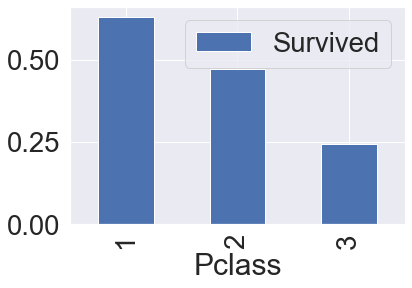

In [22]:
# 생존율을 그래프로 표현
data[['Pclass', 'Survived']].groupby('Pclass').mean().plot.bar()

생존율의 비율이 1, 2, 3등석 순으로 높음

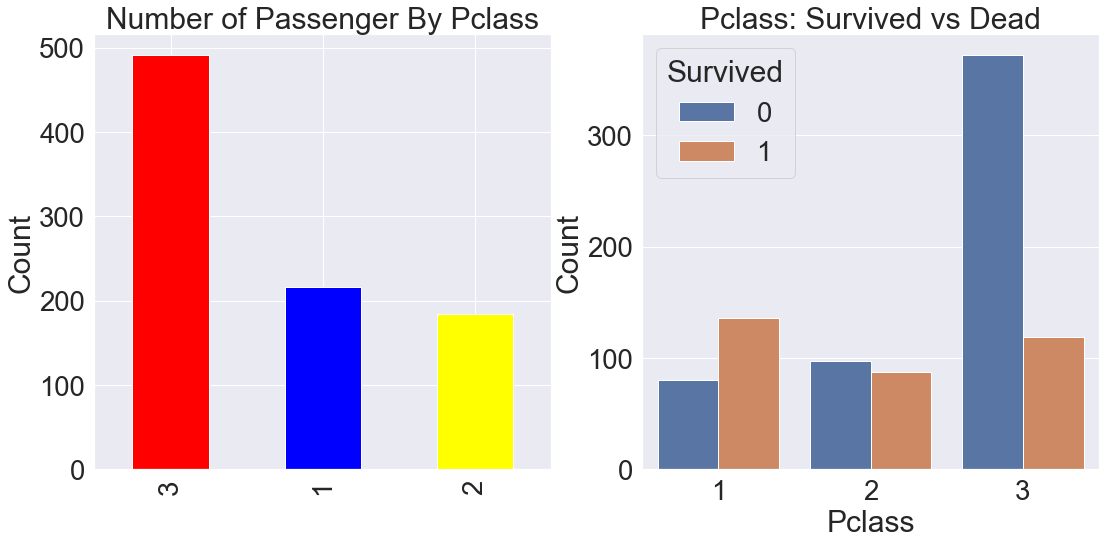

In [23]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Pclass'].value_counts().plot.bar(color = ['red', 'blue', 'yellow'], ax = ax[0])
ax[0].set_title('Number of Passenger By Pclass')
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
ax[1].set_ylabel('Count')
plt.show()

생존에 Pclass가 큰 영향을 끼치는 것으로 보이며, 모델을 구성할 때 Pclass feature를 사용하는 것이 좋을 것이라고 판단

#### Sex

In [24]:
# 성별별 탑승자의 수
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

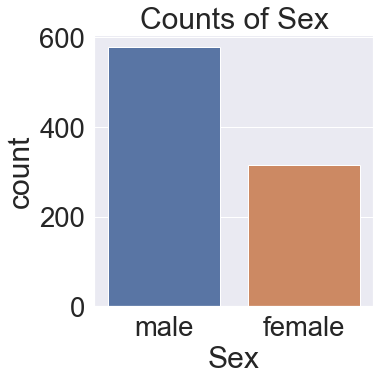

In [25]:
plt.figure(figsize = (5, 5))
sns.countplot('Sex', data = data)
plt.title('Counts of Sex')
plt.show()

탑승자의 수는 남자가 여자보다 263명 많다.

In [26]:
# 성별별 생존자의 수
data[['Sex', 'Survived']].groupby('Sex').sum()

,Survived
Sex,
female,233
male,109


생존자의 수는 여자가 남자보다 124명 많다. 

In [27]:
# 성별별 생존자의 비율 
data[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


* 여성: 약 74%
* 남성: 약 19%

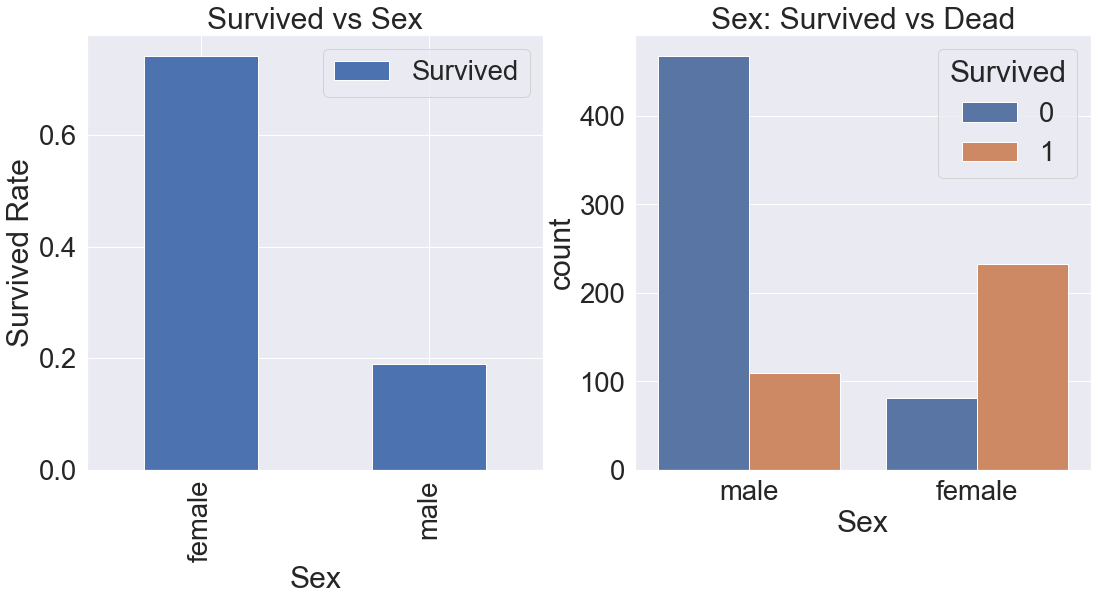

In [28]:
# 성별별 생존자의 수와 비율 비교 그래프
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data[['Sex', 'Survived']].groupby('Sex').mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')
ax[0].set_ylabel('Survived Rate')

sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Sex: Survived vs Dead')

plt.show()

생존에 성별이 큰 영향을 끼치는 것으로 보임. Pclass와 마찬가지로 예측 모델에 중요하게 사용될 feature

#### EDA - Both Sex and Pclass
* Sex, Pclass 두 가지 변수에 따라 생존율이 어떻게 달라지는지 확인

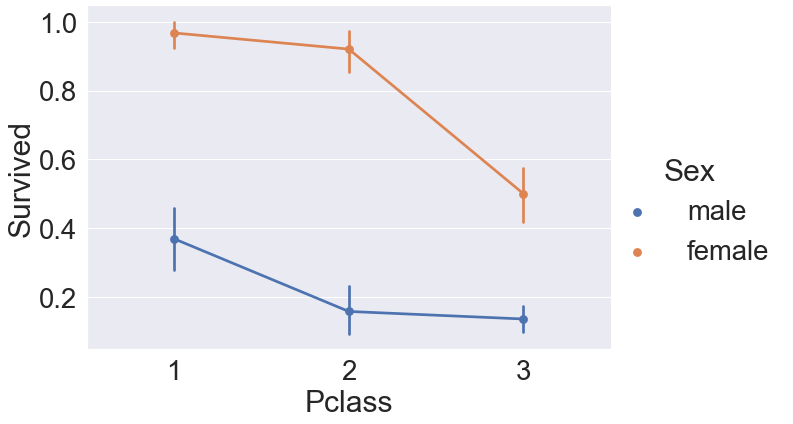

In [29]:
sns.factorplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = data, size = 6, aspect = 1.5) # aspect는 가로길이를 조정하는 param

생존율
* 1등석
    * 남성: 약 38%
    * 여성: 약 98%
* 2등석
    * 남성: 약 18%
    * 여성: 약 90%
* 3등석
    * 남성: 약 17%
    * 여성: 약 50% 

#### EDA - Age

In [30]:
print(f'나이가 제일 많은 탑승객: {round(data["Age"].max())}')
print(f'나이가 제일 적은 탑승객: {round(data["Age"].min())}')
print(f'탑승객 나이의 평균: {round(data["Age"].mean())}')

나이가 제일 많은 탑승객: 80
나이가 제일 적은 탑승객: 0
탑승객 나이의 평균: 30


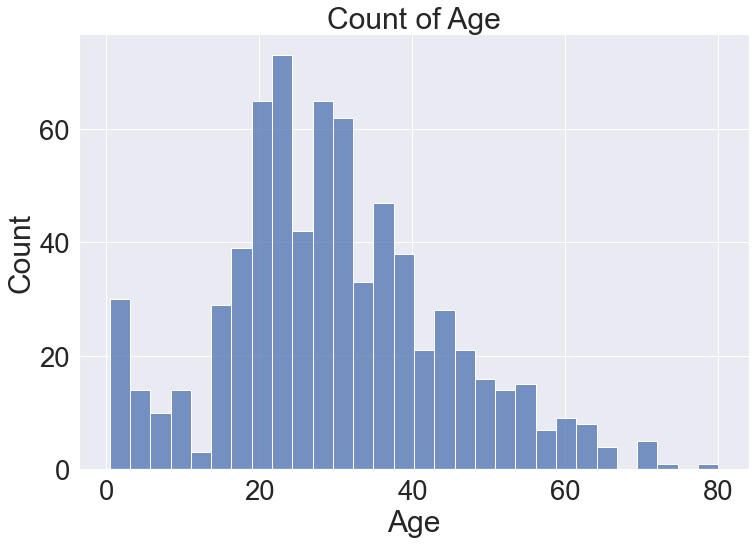

In [31]:
# 나이에 따른 탑승객의 히스토그램 
fig, ax = plt.subplots(1, 1, figsize = (12, 8))
sns.histplot(data['Age'], ax = ax, bins = 30)
ax.set_title('Count of Age')
plt.show()

20대 ~ 40대 탑승객이 많다.

KDE(Kernel Density Estimator): 커널 밀도 추정 
* 데이터의 분포를 연속적으로 표현한 그래프

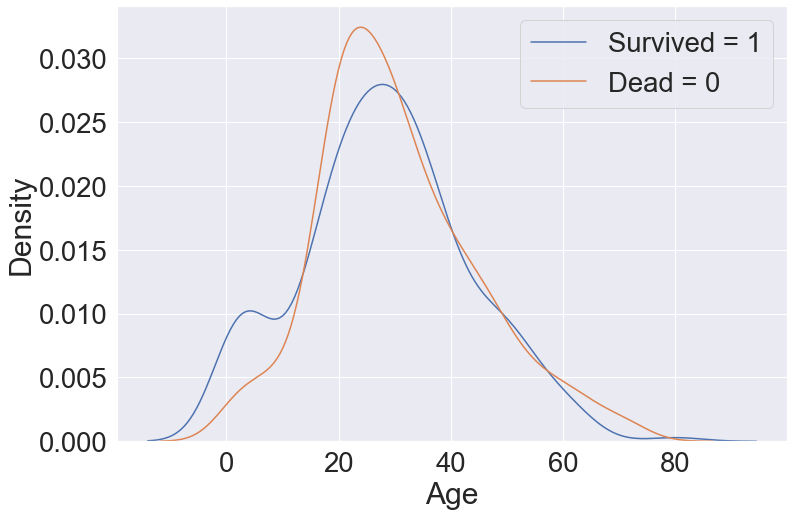

In [32]:
# 생존여부에 따른 Age의 히스토그램
fig, ax = plt.subplots(1, 1, figsize = (12, 8))
sns.kdeplot(data[data['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(data[data['Survived'] == 0]['Age'], ax = ax)
plt.legend(['Survived = 1', 'Dead = 0'])
plt.show()

사망자와 생존자 수 모두 20대 초반이 가장 많았음

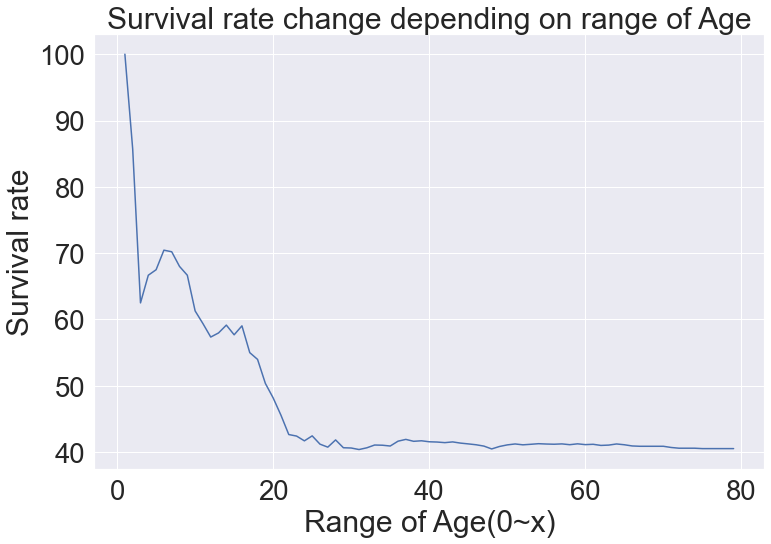

In [33]:
# Age의 범위에 따른 생존 비율
survival_ratio = []
for i in range(0, 80):
    survived = data[data['Age'] < i]['Survived'].sum()
    count = data[data['Age'] < i]['Survived'].count()
    
    rate = round(survived / count * 100, 2)
    survival_ratio.append(rate)

plt.figure(figsize = (12, 8))
plt.plot(survival_ratio)
plt.title('Survival rate change depending on range of Age')
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

나이가 많아짐에 따라 생존율이 낮아지는 추이를 확인할 수 있음. 나이 또한 모델을 생성할 때 중요한 feature로 작용이 가능함.

#### EDA - Pclass, Sex, Age
* Pclass, Sex, Age, Survived 모두에 대해서 확인

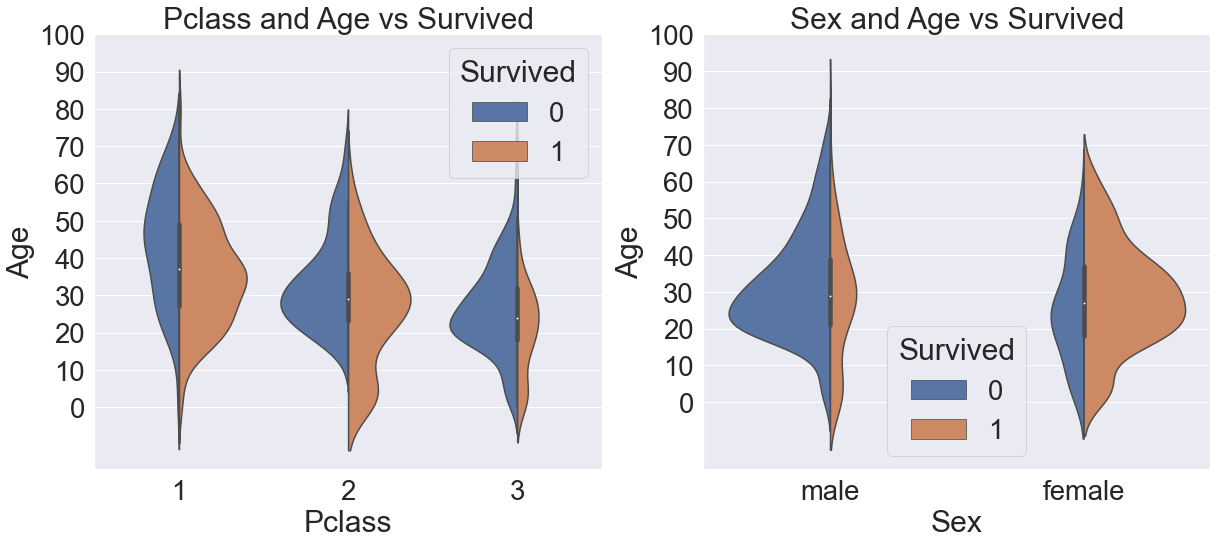

In [34]:
# Pclass - Age간 생존 여부
f, ax = plt.subplots(1, 2, figsize = (20, 8))
sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data, scale = 'count', ax = ax[0], split = True)
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

# Sex - Age간 생존 여부
sns.violinplot(x = 'Sex', y = 'Age', data = data, hue = 'Survived', scale = 'count', ax = ax[1], split = True)
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))

plt.show()

* 1등석 
    * 생존자 수: 30대 중반까지는 서서히 올라가다가 그 이후로 떨어짐
    * 사망자 수: 50세까지는 서서히 올라가다가 그 이후로 떨어짐
    * 50대 이하로는 생존자 수가 사망자 수 보다 확연히 많음
* 2등석
    * 생존자 수: 10대에서 약간 내려갔다가 30세까지 올라가고 그 이후로 떨어짐
    * 사망자 수: 30세까지 올라가고 그 이후로 떨어짐
    * 10대 이하에서 생존자 수가 사망자 수보다 확연히 많다.
    * 사망자 수와 생존자 수의 분포가 비슷함
* 3등석
    * 생존자 수: 20대 초반까지는 증가하다가 그 이후로 떨어짐
    * 사망자 수: 20대 초반까지는 증가하다가 그 이후로 떨어짐
    * 10대 이하에서는 두 집단의 수가 유사하나 그 이후로는 사망자의 수가 모든 연령층에서 월등히 많음
* 남성
    * 10대 이하에서는 생존자 수가 더 많지만 그 이후로는 사망자 수가 월등히 많음
* 여성 
    * 모든 연령층에서 생존자 수가 사망자 수보다 월등히 많음
    
* 10대 이하의 어린 연령층은 모든 클래스에서 사망률보다 생존율이 높은 것으로 보임

#### EDA - Embarked
* 탑승한 항구

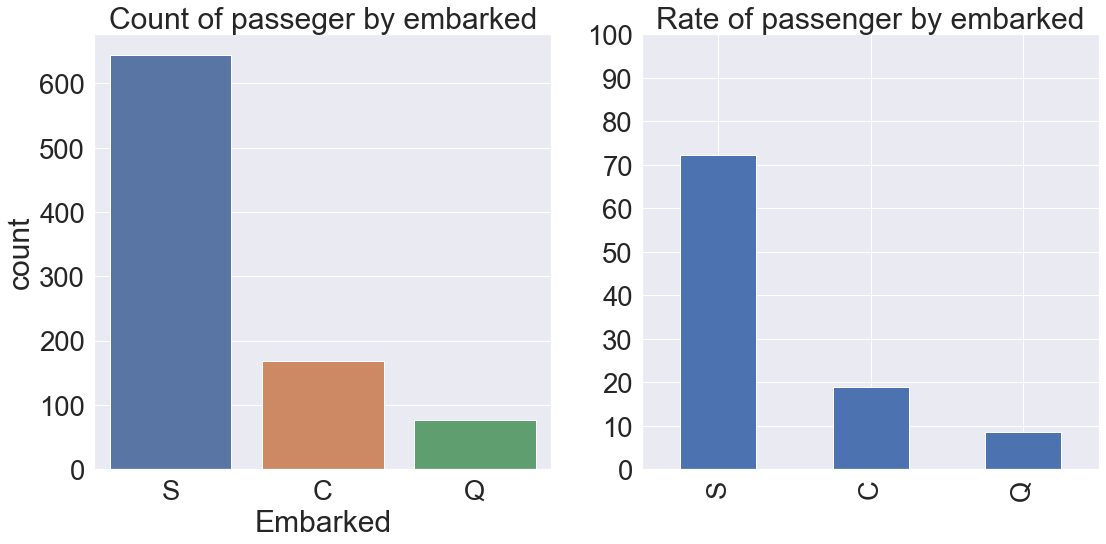

In [35]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.countplot('Embarked', data = data, ax = ax[0])
ax[0].set_title('Count of passeger by embarked')

round(data['Embarked'].value_counts() / len(data) * 100, 2).plot.bar(ax = ax[1])
ax[1].set_title('Rate of passenger by embarked')
ax[1].set_yticks(range(0, 101, 10))

* 승객이 탑승한 항구 
    * S: 약 70%
    * C: 약 20%
    * Q: 약 10% 
    

Text(0, 0.5, 'Rate')

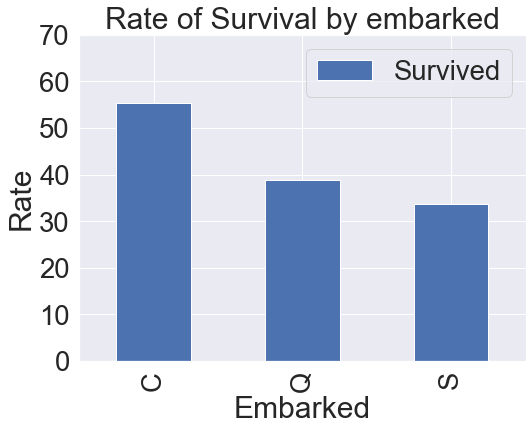

In [36]:
# 탑승 항구에 따른 생존율
f, ax = plt.subplots(1, 1, figsize = (8, 6))
embarked = data[['Embarked', 'Survived']].groupby('Embarked')
round(embarked.sum() / embarked.count() * 100, 2).plot.bar(ax = ax)
ax.set_title('Rate of Survival by embarked')
ax.set_yticks(range(0, 71, 10))
ax.set_ylabel('Rate')

생존율
* C: 약 54%
* Q: 약 40%
* S: 약 32%
* 큰 영향을 미치는 것 같지는 않지만 사용해볼만한 feature

EDA - SibSp(형제, 자매, 배우자)

In [37]:
# SibSp별 탑승객의 수
data['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

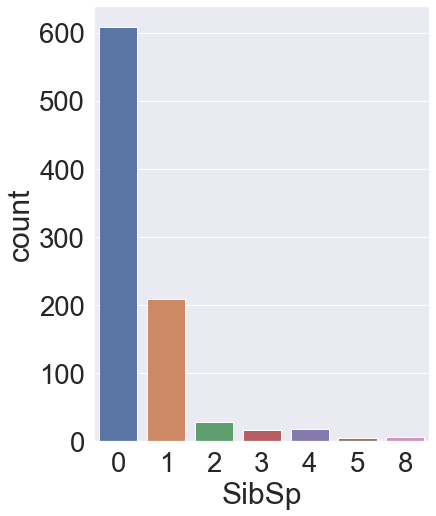

In [38]:
plt.figure(figsize = (6, 8))
sns.countplot('SibSp', data = data)

Text(0.5, 1.0, 'Survival rate of passenger by SibSp')

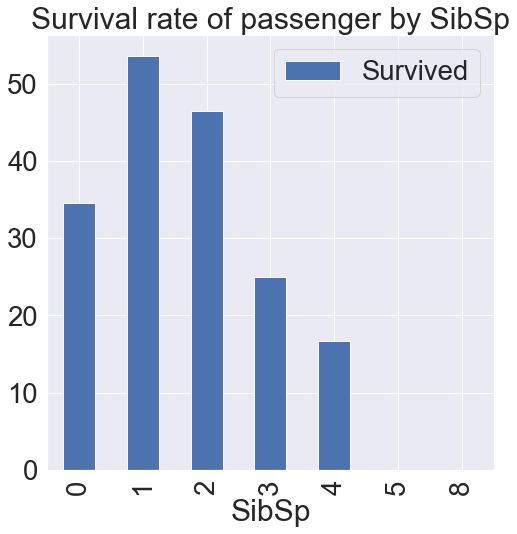

In [39]:
# SibSp별 생존율
sibsp = data[['SibSp', 'Survived']].groupby('SibSp')
round(sibsp.sum() / sibsp.count() * 100, 2).plot.bar(figsize = (8, 8))
plt.title('Survival rate of passenger by SibSp')

* 어느 정도의 영향을 미치는 것으로 생각됨

EDA - Parch(부모, 자녀)

In [40]:
# SibSp별 탑승객의 수
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='count'>

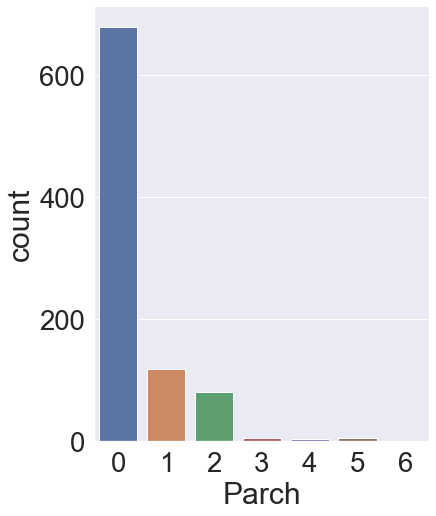

In [41]:
plt.figure(figsize = (6, 8))
sns.countplot('Parch', data = data)

Text(0.5, 1.0, 'Survival rate of passenger by Parch')

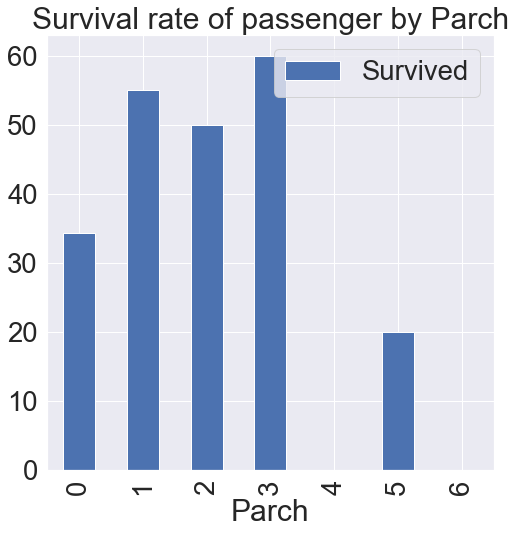

In [42]:
# Parch별 생존율
parch = data[['Parch', 'Survived']].groupby('Parch')
round(parch.sum() / parch.count() * 100, 2).plot.bar(figsize = (8, 8))
plt.title('Survival rate of passenger by Parch')

* 어느 정도의 영향을 미치는 것으로 생각됨

EDA - Family = SibSp(형제, 자매, 배우자) + Parch(부모, 자녀)

In [43]:
test_data = test.copy()

data['Family'] = data['SibSp'] + data['Parch'] + 1 # 자신 포함 
test_data['Family'] = data['SibSp'] + data['Parch'] + 1 # 자신 포함

In [44]:
# SibSp별 탑승객의 수
data['Family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

<AxesSubplot:xlabel='Family', ylabel='count'>

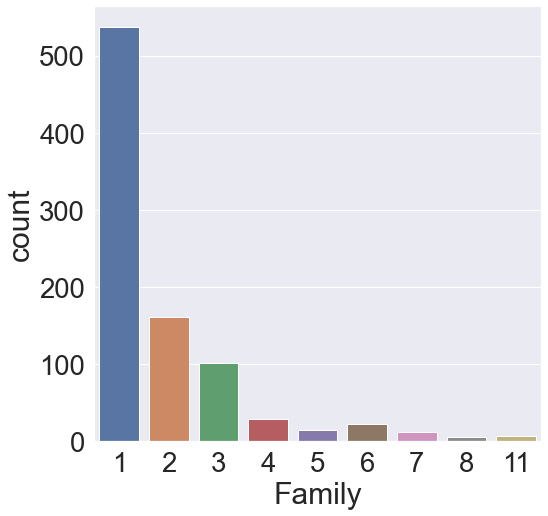

In [45]:
plt.figure(figsize = (8, 8))
sns.countplot('Family', data = data)

Text(0.5, 1.0, 'Survival rate of passenger by Family')

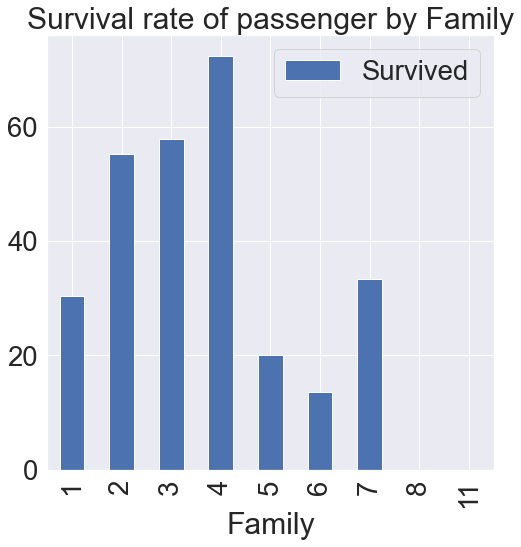

In [46]:
# Parch별 생존율
family = data[['Family', 'Survived']].groupby('Family')
round(family.sum() / family.count() * 100, 2).plot.bar(figsize = (8, 8))
plt.title('Survival rate of passenger by Family')

4인 가족의 생존율이 가장 높았음

EDA - Fare

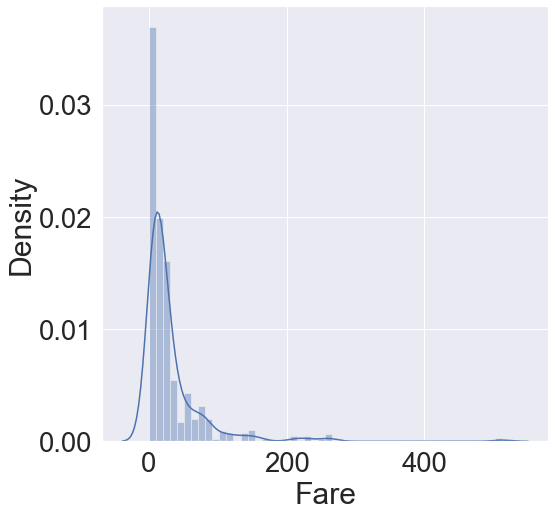

In [47]:
f, ax = plt.subplots(1, 1, figsize = (8, 8))
g = sns.distplot(data['Fare'], ax = ax)

* Fare의 비대칭성이 매우 심함. 즉, 이대로 모델에 넣을 경우 모델이 잘못 학습될 가능성이 높음 
* outlier에 민감하게 반응한다면, 실제 예측시 좋지 못한 결과를 부를 수 있음
* log를 취해서 ourlier의 영향을 줄일 수 있음.

Fare log변환

In [49]:
import numpy as np

In [50]:
# train 
data['Fare'] = np.log1p(data['Fare'])

In [51]:
# 로그 변환 전 test data의 결측값 확인
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Family           0
dtype: int64

train data에는 Fare에 결측값이 없었음

In [52]:
# Fare값에 1개의 결측치가 존재하므로 이를 평균값으로 대체 
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean()).loc[152]
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Family           0
dtype: int64

In [53]:
# 로그 변환 
# Fare가 0의 값을 가질 경우 로그를 취했을 때 무한대의 값을 가질 수 있으므로 log대신 log1p를 사용
test['Fare'] = np.log1p(test['Fare'])

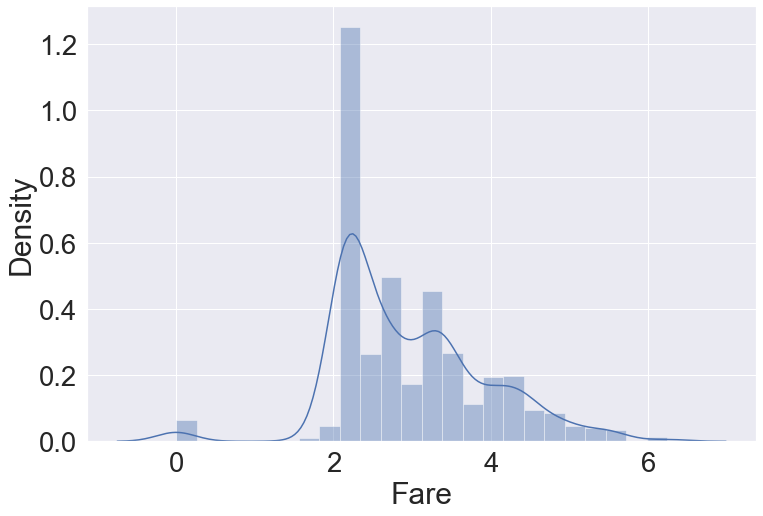

In [54]:
plt.figure(figsize = (12, 8))
sns.distplot(data['Fare'])
plt.show()

* log 변환 후 비대칭성이 많이 사라진 것을 확인 

EDA - Cabin

In [55]:
data['Cabin'].isna().sum()

687

결측치가 매우 많고 객실번호에서 공통적인 특징을 찾을 수 없기 때문에 제거

In [56]:
data.drop(['Cabin'], axis = 1, inplace = True)
test_data.drop(['Cabin'], axis = 1, inplace = True)

EDA - Ticket

In [57]:
data['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [58]:
data['Ticket'].isna().sum()

0

티켓의 종류가 너무 많기 때문에 생존에 유의미한 영향을 미치지 못할 것이라 판단

### Feature engineering
* 모델을 학습시키기 위해, 모델의 성능을 높이기 위해 feature들을 조작하거나, 새로운 feature를 추가하는 것.
* Feature engineering은 실제 모델의 학습에 사용하기 위해 하는 것이므로 train뿐만 아니라 test에도 똑같이 적용해주어야함.

#### 결측치 처리 
* null data를 어떻게 채우느냐에 따라 모델의 성능이 크게 바뀔 수 있음

In [59]:
# train data 결측치 확인
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Family           0
dtype: int64

* Age: 177개
* Embarked: 2개

In [60]:
# test data 결측치 확인
test_data.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Family          0
dtype: int64

* Age: 86개

Age의 결측치는 title + statics를 사용하여 대체할 수 있음
* title이란 영어 이름에 들어가는 Miss, Mrr, Mrs와 같은 것이다.
* 정규 표현식 사용

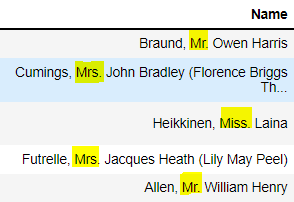

In [61]:
# title 컬럼 추가
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.')
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.')

In [62]:
# train
data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [63]:
# test
test_data['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [64]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S,1,Mr


In [65]:
data[['Sex', 'Title']].groupby(['Sex', 'Title'])['Title'].count()

Sex     Title   
female  Countess      1
        Dr            1
        Lady          1
        Miss        182
        Mlle          2
        Mme           1
        Mrs         125
        Ms            1
male    Capt          1
        Col           2
        Don           1
        Dr            6
        Jonkheer      1
        Major         2
        Master       40
        Mr          517
        Rev           6
        Sir           1
Name: Title, dtype: int64

In [66]:
test_data[['Sex', 'Title']].groupby(['Sex', 'Title'])['Title'].count()

Sex     Title 
female  Dona        1
        Miss       78
        Mrs        72
        Ms          1
male    Col         2
        Dr          1
        Master     21
        Mr        240
        Rev         2
Name: Title, dtype: int64

In [67]:
test_data[test_data['Title'] == 'Dona']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Title
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,35.627188,C,1,Dona


* Mlle: 불어 Mademoiselle - 미혼 여성 
* Lady: 귀족 여성
* Countess: 백작의 여성형
* Mme: Ma'am, madam - 부인, 여사, 마님
* Capt: capting - 대장/대위/대령, 상위 관리자 남성
* Col, Sir: 신사, 선생님
* Don, Jonkheer: 작위없는 남성 귀족 
* Major: 군대 계급 영어식 표현 
* Rev: 성직자 

In [68]:
data['Title'] = data['Title'].replace(['Mlle', 'Countess', 'Lady', 'Mme', 
                                       'Ms', 'Capt', 'Col', 'Don', 
                                       'Dr', 'Jonkheer', 'Major', 'Rev', 'Sir'],
                                      ['Miss', 'Mrs', 'Miss', 'Mrs', 
                                      'Miss', 'Mr', 'Mr', 'Mr',
                                      'Mr', 'Mr', 'Mr', 'Mr', 'Mr']
                                     )

test_data['Title'] = test_data['Title'].replace(['Dona', 'Ms', 'Col', 'Dr', 'Rev'],
                                               ['Mrs', 'Miss', 'Mr', 'Mr', 'Mr'])

In [69]:
data[['Sex', 'Title']].groupby(['Sex', 'Title'])['Title'].count()

Sex     Title 
female  Miss      186
        Mr          1
        Mrs       127
male    Master     40
        Mr        537
Name: Title, dtype: int64

In [70]:
# Female Mr 잘못 들어간 부분 수정
data.loc[data[(data['Title'] == 'Mr') & (data['Sex'] == 'female')].index, 'Title'] = 'Mrs'
data.loc[796]

PassengerId                            797
Survived                                 1
Pclass                                   1
Name           Leader, Dr. Alice (Farnham)
Sex                                 female
Age                                   49.0
SibSp                                    0
Parch                                    0
Ticket                               17465
Fare                              3.293211
Embarked                                 S
Family                                   1
Title                                  Mrs
Name: 796, dtype: object

In [71]:
data[['Sex', 'Title']].groupby(['Sex', 'Title'])['Title'].count()

Sex     Title 
female  Miss      186
        Mrs       128
male    Master     40
        Mr        537
Name: Title, dtype: int64

In [72]:
test_data[['Sex', 'Title']].groupby(['Sex', 'Title'])['Title'].count()

Sex     Title 
female  Miss       79
        Mrs        73
male    Master     21
        Mr        245
Name: Title, dtype: int64

Age의 결측치를 각 Title의 평균값으로 대체

In [73]:
# 나이가 null이면 해당 title의 나이 평균값으로 나이를 대체
def fillna_age(df, title):
    df.loc[(df['Age'].isnull()) & (df['Title'] == title),'Age'] = round(df[df['Title'] == title]['Age'].mean())
    
    return df

In [74]:
data = fillna_age(data, 'Miss')
data = fillna_age(data, 'Mrs')
data = fillna_age(data, 'Master')
data = fillna_age(data, 'Mr')

test_data = fillna_age(test_data, 'Miss')
test_data = fillna_age(test_data, 'Mrs')
test_data = fillna_age(test_data, 'Master')
test_data = fillna_age(test_data, 'Mr')

In [75]:
data.isnull().sum() # train 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Family         0
Title          0
dtype: int64

In [76]:
test_data.isnull().sum() # test

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Family         0
Title          0
dtype: int64

Age의 결측치가 모두 대체된 것을 확인 
* train data의 Embarked 컬럼에 2개의 결측치가 포함됨

가장 많은 항구로 대체

In [77]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [78]:
data['Embarked'].loc[data['Embarked'].isnull()] = 'S'

In [79]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Family         0
Title          0
dtype: int64

모든 결측치 대체 완료

String으로 값이 들어가 있는 컬럼을 numerical한 값으로 대체

- Sex
    * male = 0
    * female = 1
- Embarked 
    * S = 0
    * C = 1
    * Q = 2

In [80]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,2.110213,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.280593,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.188856,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.990834,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.202765,S,1,Mr


In [81]:
# Sex
data['Sex'] = data['Sex'].replace(['male', 'female'], [0, 1])
test_data['Sex'] = test_data['Sex'].replace(['male', 'female'], [0, 1])

In [82]:
# Category로 Type 변경
# 필수는 아니지만 불피요한 메모리 사용량 줄일 수 있음
data['Sex'] = data['Sex'].astype('category')
test_data['Sex'] = test_data['Sex'].astype('category')

In [83]:
# Embarked
data['Embarked'] = data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])
test_data['Embarked'] = test_data['Embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])

In [84]:
data['Embarked'] = data['Embarked'].astype('category')
test_data['Embarked'] = test_data['Embarked'].astype('category')

Name, Ticket은 특징을 찾을 수 없으므로 제거

In [85]:
data = data.drop(['Name', 'Ticket'], axis = 1)
test_data = test_data.drop(['Name', 'Ticket'], axis = 1)

In [86]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title
0,1,0,3,0,22.0,1,0,2.110213,0,2,Mr
1,2,1,1,1,38.0,1,0,4.280593,1,2,Mrs
2,3,1,3,1,26.0,0,0,2.188856,0,1,Miss
3,4,1,1,1,35.0,1,0,3.990834,0,2,Mrs
4,5,0,3,0,35.0,0,0,2.202765,0,1,Mr


Title 컬럼 One hot encoding

In [87]:
train = pd.get_dummies(data, columns = ['Title'], prefix = 'Title')
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,1,0,3,0,22.0,1,0,2.110213,0,2,0,0,1,0
1,2,1,1,1,38.0,1,0,4.280593,1,2,0,0,0,1
2,3,1,3,1,26.0,0,0,2.188856,0,1,0,1,0,0
3,4,1,1,1,35.0,1,0,3.990834,0,2,0,0,0,1
4,5,0,3,0,35.0,0,0,2.202765,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,2.639057,0,1,0,0,1,0
887,888,1,1,1,19.0,0,0,3.433987,0,1,0,1,0,0
888,889,0,3,1,22.0,1,2,3.196630,0,4,0,1,0,0
889,890,1,1,0,26.0,0,0,3.433987,1,1,0,0,1,0


In [88]:
train.drop(['PassengerId'], axis = 1, inplace = True)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,0,3,0,22.0,1,0,2.110213,0,2,0,0,1,0
1,1,1,1,38.0,1,0,4.280593,1,2,0,0,0,1
2,1,3,1,26.0,0,0,2.188856,0,1,0,1,0,0
3,1,1,1,35.0,1,0,3.990834,0,2,0,0,0,1
4,0,3,0,35.0,0,0,2.202765,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,2.639057,0,1,0,0,1,0
887,1,1,1,19.0,0,0,3.433987,0,1,0,1,0,0
888,0,3,1,22.0,1,2,3.196630,0,4,0,1,0,0
889,1,1,0,26.0,0,0,3.433987,1,1,0,0,1,0


In [89]:
test = pd.get_dummies(test_data, columns = ['Title'], prefix = 'Title')
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,892,3,0,34.5,0,0,35.627188,2,2,0,0,1,0
1,893,3,1,47.0,1,0,35.627188,0,2,0,0,0,1
2,894,2,0,62.0,0,0,35.627188,2,1,0,0,1,0
3,895,3,0,27.0,0,0,35.627188,0,2,0,0,1,0
4,896,3,1,22.0,1,1,35.627188,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,32.0,0,0,35.627188,0,1,0,0,1,0
414,1306,1,1,39.0,0,0,35.627188,1,1,0,0,0,1
415,1307,3,0,38.5,0,0,35.627188,0,1,0,0,1,0
416,1308,3,0,32.0,0,0,35.627188,0,3,0,0,1,0


In [90]:
test.drop(['PassengerId'], axis = 1, inplace = True)

In [91]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,3,0,34.5,0,0,35.627188,2,2,0,0,1,0
1,3,1,47.0,1,0,35.627188,0,2,0,0,0,1
2,2,0,62.0,0,0,35.627188,2,1,0,0,1,0
3,3,0,27.0,0,0,35.627188,0,2,0,0,1,0
4,3,1,22.0,1,1,35.627188,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,0,32.0,0,0,35.627188,0,1,0,0,1,0
414,1,1,39.0,0,0,35.627188,1,1,0,0,0,1
415,3,0,38.5,0,0,35.627188,0,1,0,0,1,0
416,3,0,32.0,0,0,35.627188,0,3,0,0,1,0


#### Data Splitting

In [92]:
y = train['Survived']
x = train.drop('Survived', axis = 1)

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title_Master,Title_Miss,Title_Mr,Title_Mrs
0,3,0,22.0,1,0,2.110213,0,2,0,0,1,0
1,1,1,38.0,1,0,4.280593,1,2,0,0,0,1
2,3,1,26.0,0,0,2.188856,0,1,0,1,0,0
3,1,1,35.0,1,0,3.990834,0,2,0,0,0,1
4,3,0,35.0,0,0,2.202765,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,2.639057,0,1,0,0,1,0
887,1,1,19.0,0,0,3.433987,0,1,0,1,0,0
888,3,1,22.0,1,2,3.196630,0,4,0,1,0,0
889,1,0,26.0,0,0,3.433987,1,1,0,0,1,0


In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [96]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(712, 12) (179, 12) (712,) (179,)


### Model generation and prediction 
* Random Forest

In [ ]:
from sklearn import Random

Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [99]:
rf = RandomForestClassifier()

Tuning

In [100]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits = 10)

In [101]:
# Search grid for optimal parameters
rf_param_grid = {
    'max_depth': [None],
    'max_features': [1, 3, 10],
    'min_samples_split': [2, 3, 10],
    'min_samples_leaf': [1, 3, 10],
    'bootstrap': [False],
    'n_estimators': [100, 300],
    'criterion': ['gini']
}

gsrf = GridSearchCV(rf, param_grid = rf_param_grid, cv = kfold, scoring = 'accuracy', n_jobs = 4, verbose = 1)

In [102]:
gsrf.fit(x_train, y_train)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': [None], 'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10],
                         'n_estimators': [100, 300]},
             scoring='accuracy', verbose=1)

In [103]:
gsrf_best = gsrf.best_estimator_
gsrf_best

RandomForestClassifier(bootstrap=False, max_features=10, min_samples_leaf=10,
                       min_samples_split=10)

In [104]:
# Best Score
gsrf.best_score_

0.8329616588419405

test data로 예측

In [105]:
prediction_rf = gsrf.predict(test)

In [106]:
submission_rf = gender_submission.copy()
submission_rf

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [107]:
submission_rf['Survived'] = prediction_rf
submission_rf

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [108]:
submission_rf.to_csv('./submission/titanic_rf.csv', index = False)

* 아래는 기본 데이터에서 단순히 Age의 결측치를 전체 평균으로 대체, Embarked포함 행 삭제, Cabin, Name, PassengerId, Ticket 컬럼을 삭제한 후 돌린 정확도
* Feature engineering을 정밀하게 수행하였을 때 정확도가 눈에 띄게 높아진 것을 확인할 수 있음

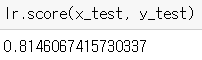

#### 캐글 제출 결과
* Tuning후 RandomForest(상위 13.62%)
* Tuning전 RandomForest
* Logistic Regression

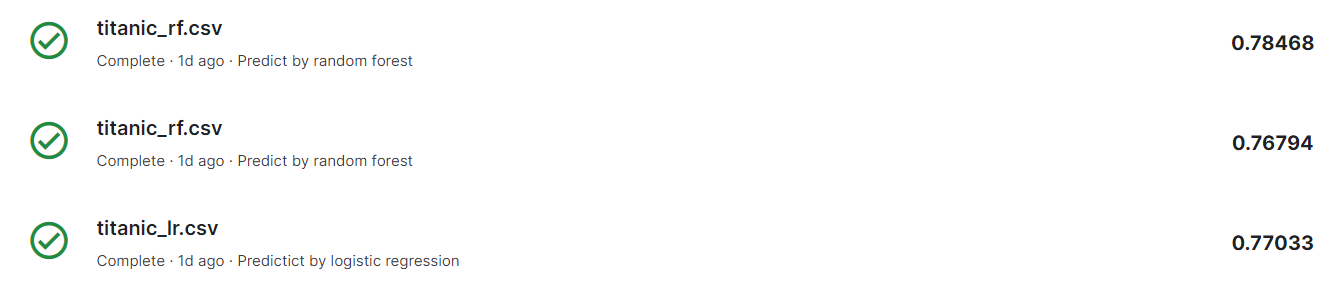

### Feature importance

In [109]:
from pandas import Series

In [110]:
feature_importance = gsrf_best.feature_importances_
feature_importance

array([1.54138657e-01, 7.24265462e-02, 6.90373120e-02, 6.96781116e-03,
       3.65287413e-03, 1.46635971e-01, 1.74236449e-02, 6.38780019e-02,
       1.87738317e-05, 7.79033971e-03, 4.54427018e-01, 3.60304954e-03])

In [111]:
Series_feat_imp = Series(feature_importance, index = x_test.columns)
Series_feat_imp

Pclass          0.154139
Sex             0.072427
Age             0.069037
SibSp           0.006968
Parch           0.003653
Fare            0.146636
Embarked        0.017424
Family          0.063878
Title_Master    0.000019
Title_Miss      0.007790
Title_Mr        0.454427
Title_Mrs       0.003603
dtype: float64

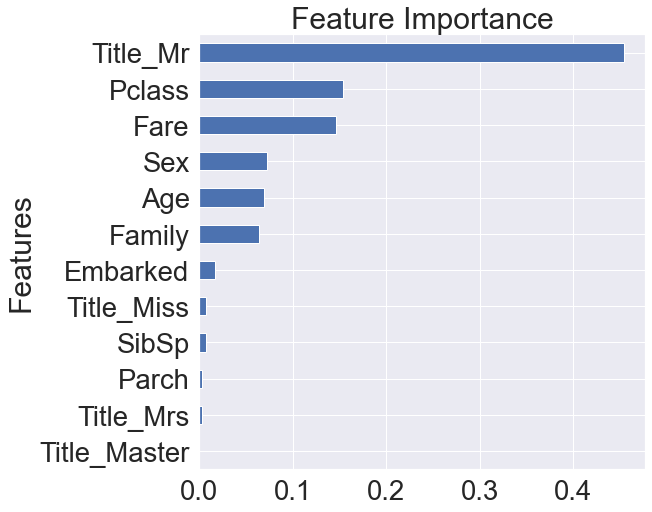

In [112]:
plt.figure(figsize = (8, 8))
Series_feat_imp.sort_values().plot.barh()
plt.title('Feature Importance')
plt.ylabel('Features')
plt.show()

* Sex
* Title Mr
* Fare
* age
* Pclass
* 위와 같은 feature가 생존 결과 예측에 큰 영향을 미치는 것으로 보임